MovieWriter imagemagick unavailable; using Pillow instead.


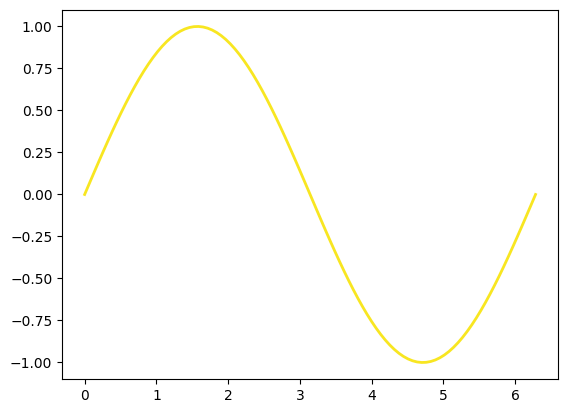

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a line object
(line,) = ax.plot(x, y, lw=2)


# Function to update the color of the line
def update_color(frame):
    color = plt.cm.viridis(frame / 100)  # Use a colormap to change the color
    line.set_color(color)
    return (line,)


# Create the animation
ani = animation.FuncAnimation(fig, update_color, frames=100, interval=50, blit=True)

# Display the animation
ani.save("output.gif", writer="imagemagick")


In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create a line object
(line,) = ax.plot(x, y, lw=2)

# Function to update the color of the line
def update_color(frame):
    color = plt.cm.viridis(frame / 100)  # Use a colormap to change the color
    line.set_color(color)
    return (line,)


# Create the animation
ani = animation.FuncAnimation(fig, update_color, frames=100, interval=50, blit=True)

# Display the animation
ani.save("output.gif", writer="imagemagick")


In [14]:
np.random.randint(0,10)

7

In [22]:
from matplotlib import animation
# solve the ode problem of the double compound pendulum again

from scipy.integrate import odeint
from numpy import cos, sin

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]

    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state
t = np.linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])
    return pendulum1, pendulum2, 

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])

    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])

    return pendulum1, pendulum2, 

anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)

# anim.save can be called in a few different ways, some which might or might not work
# on different platforms and with different versions of matplotlib and video encoders
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'], writer=animation.FFMpegWriter())
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
#anim.save('animation.mp4', fps=20, writer="ffmpeg", codec="libx264")
anim.save('animation.gif', fps=20, writer="avconv", codec="libx264")

plt.close(fig)

MovieWriter avconv unavailable; using Pillow instead.


MovieWriter imagemagick unavailable; using Pillow instead.


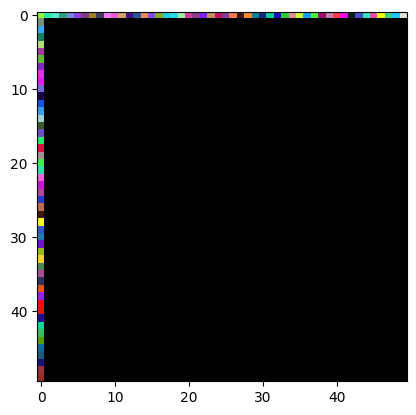

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

N = 50

fig, ax = plt.subplots()

def update(i):
  a = np.uint8(np.random.uniform(0, 255, [N, N, 3]))
  a[i:, i:] = 0.
  plt.clf()
  plt.imshow(a)
ani = animation.FuncAnimation(fig, update, np.arange(1,  N), interval=25)  # 代入しないと消される

# Display the animation
ani.save("output_2.gif", writer="imagemagick")





MovieWriter imagemagick unavailable; using Pillow instead.


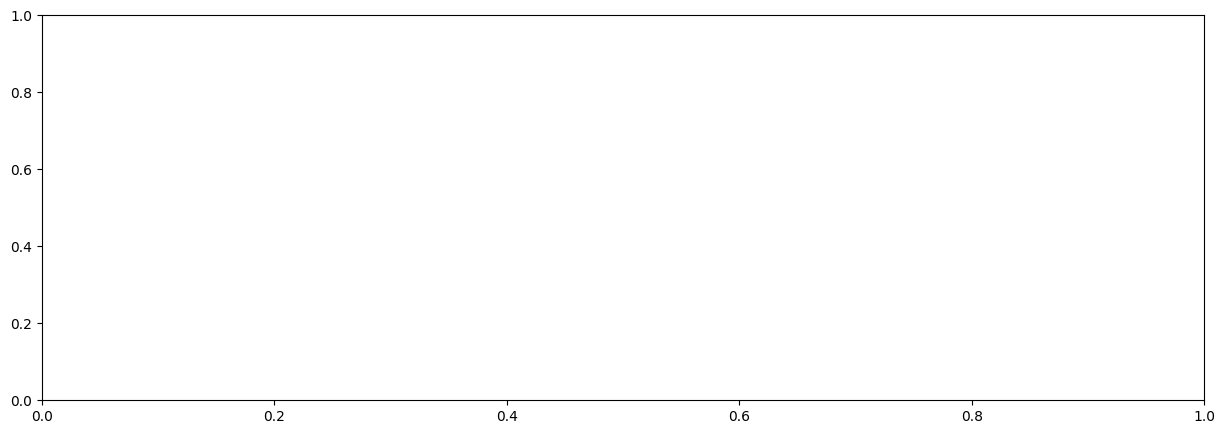

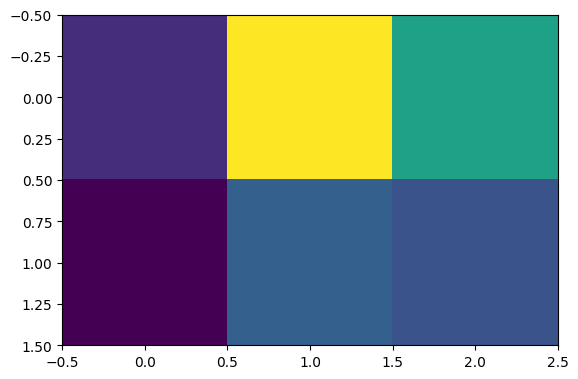

In [35]:
#重みを保存しておくclassだけを作っておいて、gifにするのは後でやってもらう

import torch
v=torch.Tensor(np.random.rand(2, 3))
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

N = 50

fig, ax = plt.subplots()

def update(i):
    a = np.random.rand(2,3)
    plt.clf()
    plt.imshow(a)
ani = animation.FuncAnimation(fig, update, np.arange(1,  N), interval=25)  # 代入しないと消される

# Display the animation
ani.save("output_2.gif", writer="imagemagick")

In [49]:
class WandbHolder:
    def __init__(self,weights):
        #設計悩む
        #初期にモデルのstateをもらってlogだけ作るか
        self.sample_weight=weights
        self.save_path="class_output.gif"#fix later
    
    def add_model_state(self):
        return 

    def _update(self,i):
        a = self.sample_weight[i]
        print(i,a)
        plt.clf()
        plt.imshow(a)
    
    def save_gif(self):
        fig,ax=plt.subplots()
        N=len(self.sample_weight)

        ani = animation.FuncAnimation(fig, self._update, np.arange(1,  N), interval=25)  # 代入しないと消される

        # Display the animation
        ani.save(self.save_path, writer="imagemagick")


MovieWriter imagemagick unavailable; using Pillow instead.


1 tensor([[0.8162, 0.7839, 0.3016],
        [0.7582, 0.7004, 0.0872]])
1 tensor([[0.8162, 0.7839, 0.3016],
        [0.7582, 0.7004, 0.0872]])
2 tensor([[0.6747, 0.2397, 0.1299],
        [0.3371, 0.0837, 0.8222]])
1 tensor([[0.8162, 0.7839, 0.3016],
        [0.7582, 0.7004, 0.0872]])


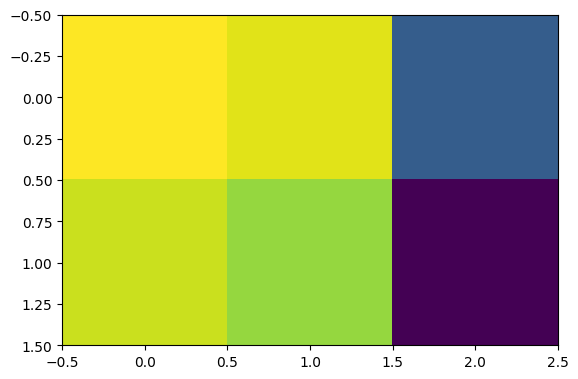

In [52]:
weights=torch.Tensor([np.random.rand(2,3) for _ in range(3)])

sample=WandbHolder(weights)
sample.save_gif()

MovieWriter imagemagick unavailable; using Pillow instead.


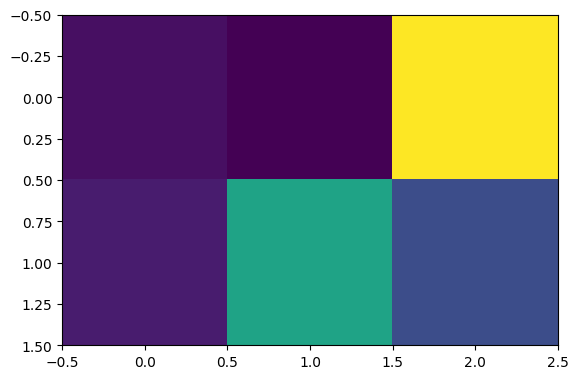

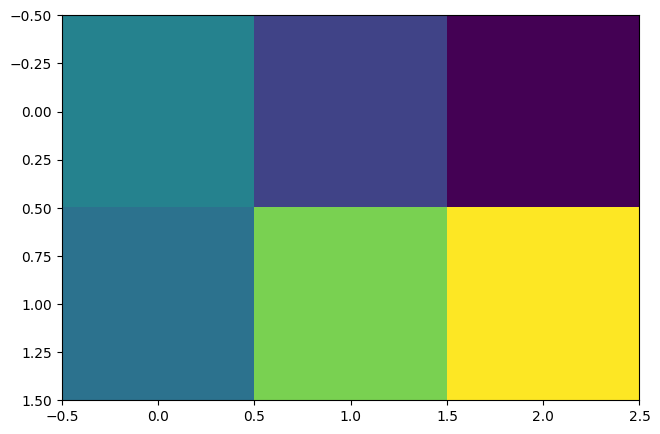

In [29]:
v=torch.Tensor(np.random.rand(2,3))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(v.detach().numpy(), cmap="viridis")
ax.imshow(v.detach().numpy(), cmap="viridis")

In [28]:
type(ax.plot([1],[2]))

list

MovieWriter avconv unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

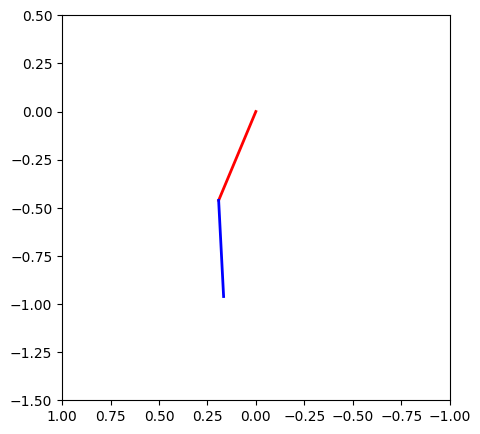

In [9]:
from matplotlib import animation
# solve the ode problem of the double compound pendulum again

from scipy.integrate import odeint
from numpy import cos, sin

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]

    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state
t = np.linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])
    return pendulum1, pendulum2, 

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])

    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])

    return pendulum1, pendulum2, 

anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)

# anim.save can be called in a few different ways, some which might or might not work
# on different platforms and with different versions of matplotlib and video encoders
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'], writer=animation.FFMpegWriter())
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
#anim.save('animation.mp4', fps=20, writer="ffmpeg", codec="libx264")
anim.save('animation.mp4', fps=20, writer="avconv", codec="libx264")

plt.close(fig)